In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
humidity_df = pd.read_csv('humidity.csv')
pressure_df = pd.read_csv('pressure.csv')
temperature_df = pd.read_csv('temperature.csv')
weather_description_df = pd.read_csv('weather_description.csv')
wind_direction_df = pd.read_csv('wind_direction.csv')
wind_speed_df = pd.read_csv('wind_speed.csv')

In [3]:
humidity = humidity_df[['datetime', 'Kansas City']]
pressure = pressure_df[['datetime', 'Kansas City']]
temperature = temperature_df[['datetime', 'Kansas City']]
weather_description = weather_description_df[['datetime', 'Kansas City']]
wind_direction = wind_direction_df[['datetime', 'Kansas City']]
wind_speed = wind_speed_df[['datetime', 'Kansas City']]

In [4]:
wind_speed.head()

,datetime,Kansas City
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,0.0
2,2012-10-01 14:00:00,0.0
3,2012-10-01 15:00:00,0.0
4,2012-10-01 16:00:00,0.0


In [5]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed'] 
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,sky is clear,71.0,1011.0,289.980000,0.0,0.0
2,2012-10-01 14:00:00,sky is clear,70.0,1011.0,289.997635,6.0,0.0
3,2012-10-01 15:00:00,sky is clear,70.0,1011.0,290.038151,20.0,0.0
4,2012-10-01 16:00:00,sky is clear,70.0,1011.0,290.078666,34.0,0.0


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     45252 non-null  object 
 2   Humidity        44741 non-null  float64
 3   Pressure        45132 non-null  float64
 4   Temperature     45252 non-null  float64
 5   Wind_Direction  45252 non-null  float64
 6   Wind_Speed      45252 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [7]:
#Checking the amount of missing values
weather_df.isnull().sum()

Datetime            0
Description         1
Humidity          512
Pressure          121
Temperature         1
Wind_Direction      1
Wind_Speed          1
dtype: int64

In [8]:
#Checking the percentage of missing values
weather_df.isnull().mean()*100

Datetime          0.000000
Description       0.002210
Humidity          1.131417
Pressure          0.267386
Temperature       0.002210
Wind_Direction    0.002210
Wind_Speed        0.002210
dtype: float64

In [9]:
#Since the amount of missing values is very minute, so dropping all of them
weather_df.dropna(inplace=True)

In [10]:
weather_df.isnull().sum()

Datetime          0
Description       0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
dtype: int64

In [11]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
count,44737.000000,44737.000000,44737.000000,44737.000000,44737.000000
mean,66.633167,1016.260880,286.723587,180.065337,3.442587
std,18.303102,18.368243,11.180747,99.202131,2.092210
min,10.000000,886.000000,249.556333,0.000000,0.000000
25%,54.000000,1012.000000,278.440000,110.000000,2.000000
50%,68.000000,1017.000000,288.210000,182.000000,3.000000
75%,81.000000,1025.000000,295.700000,249.000000,5.000000
max,100.000000,1066.000000,310.970000,360.000000,15.000000


In [12]:
weather_df.columns

Index(['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature',
       'Wind_Direction', 'Wind_Speed'],
      dtype='object')

In [14]:
weather_df['Description'].unique()

array(['sky is clear', 'broken clouds', 'few clouds', 'scattered clouds',
       'shower rain', 'light intensity shower rain',
       'proximity shower rain', 'haze', 'fog', 'overcast clouds',
       'light rain', 'light intensity drizzle', 'mist',
       'thunderstorm with light rain', 'thunderstorm', 'heavy snow',
       'heavy intensity rain', 'snow', 'moderate rain', 'light snow',
       'thunderstorm with rain', 'proximity thunderstorm',
       'heavy intensity shower rain', 'thunderstorm with heavy rain',
       'very heavy rain', 'smoke', 'freezing rain', 'shower drizzle',
       'squalls', 'drizzle'], dtype=object)

In [15]:
weather_df['Description'].nunique()

30

In [16]:
#Amount of unqiue data points is too much to make plots
weather_df['Description'].value_counts().sort_values(ascending = False)

sky is clear                    20005
overcast clouds                  4477
few clouds                       4275
light rain                       3393
broken clouds                    3311
scattered clouds                 2891
mist                             2559
moderate rain                    1231
heavy intensity rain              585
light snow                        390
haze                              335
fog                               322
proximity thunderstorm            241
snow                              123
light intensity drizzle           119
proximity shower rain             112
thunderstorm                       69
light intensity shower rain        63
thunderstorm with light rain       56
heavy snow                         48
very heavy rain                    32
shower rain                        32
smoke                              24
thunderstorm with heavy rain       12
thunderstorm with rain              9
heavy intensity shower rain         8
drizzle     

In [17]:
# A Clear weather is more frequent in Kansas City Missouri

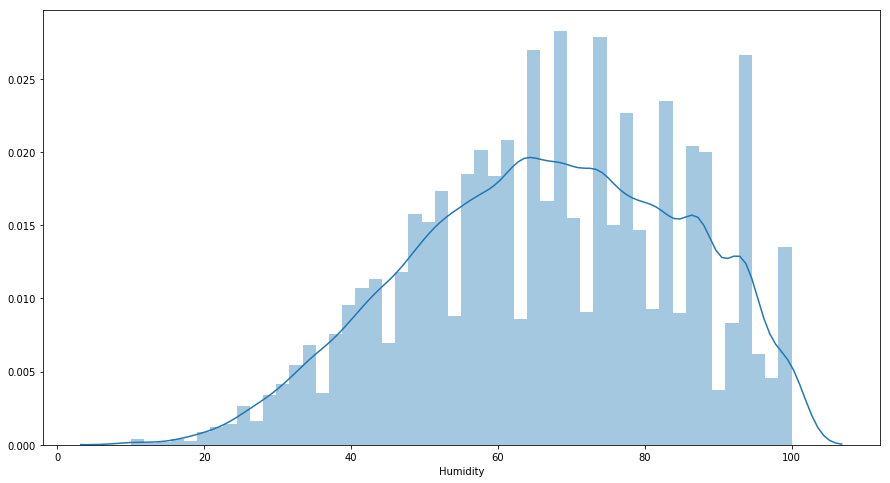

In [18]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Humidity'], kde=True)

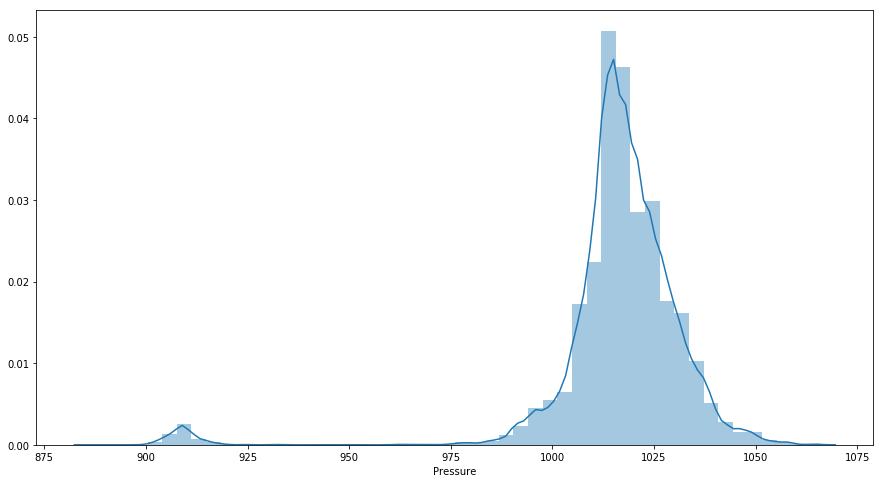

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Pressure'], kde=True)

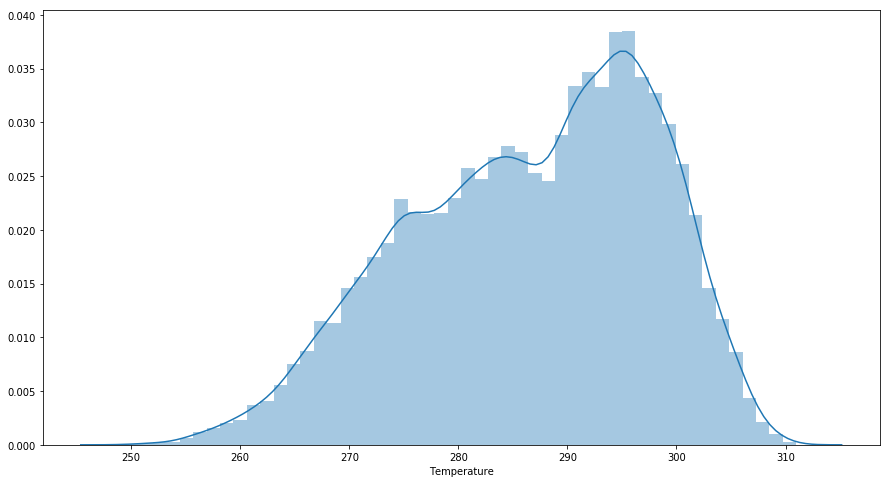

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Temperature'], kde=True)

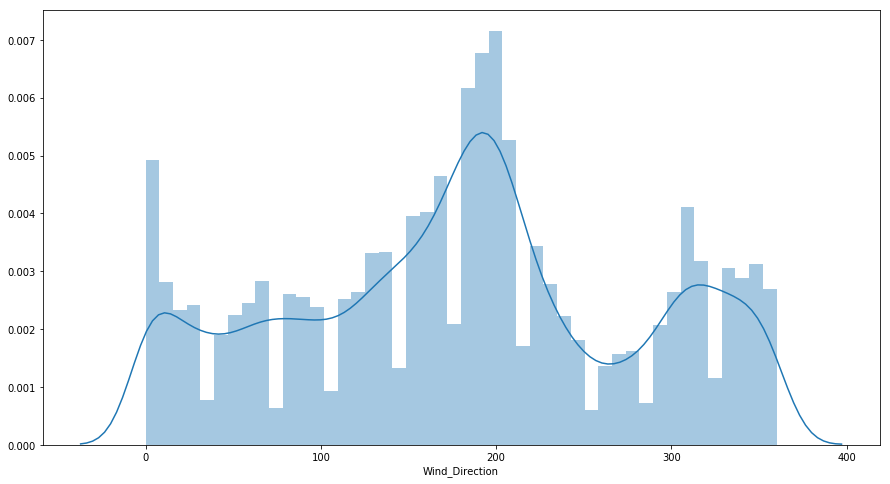

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Wind_Direction'], kde=True)

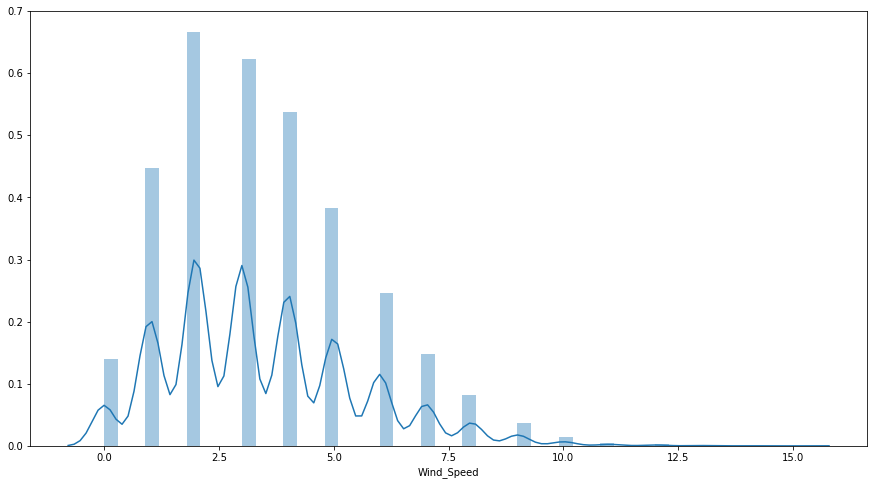

In [22]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Wind_Speed'], kde=True)

In [23]:
#Humidity, Pressure and Temperature fairly have a normal distribution

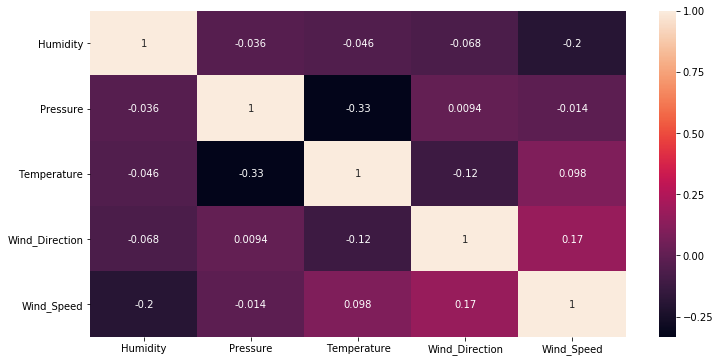

In [24]:
#Checking the correlation between the variables
plt.figure(figsize=(12,6))
sns.heatmap(weather_df.corr(), annot=True)

In [25]:
#No signs of MUlticollinearity

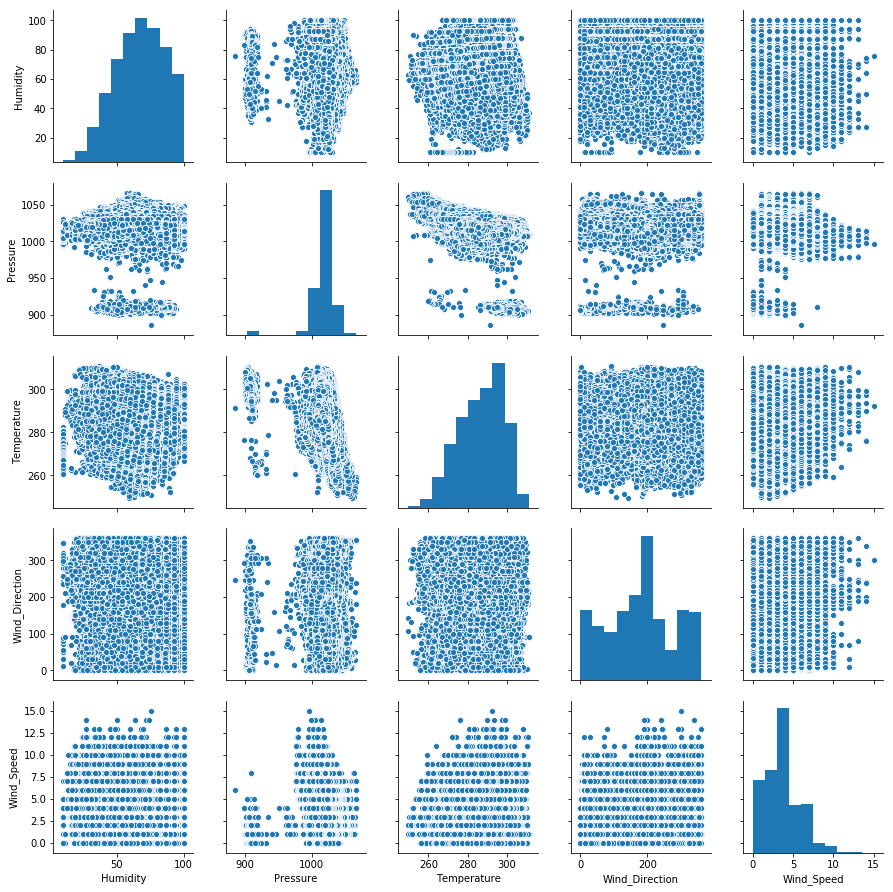

In [26]:
#Using a pairplot to Visualize all the variables
sns.pairplot(weather_df)

In [27]:
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime'])

In [28]:
#Extracting the date and time from the date time feature
weather_df['Day'] = weather_df['Datetime'].apply(lambda time: time.day)
weather_df['Time'] = weather_df['Datetime'].apply(lambda time: time.hour)

In [29]:
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Day,Time
1,2012-10-01 13:00:00,sky is clear,71.0,1011.0,289.980000,0.0,0.0,1,13
2,2012-10-01 14:00:00,sky is clear,70.0,1011.0,289.997635,6.0,0.0,1,14
3,2012-10-01 15:00:00,sky is clear,70.0,1011.0,290.038151,20.0,0.0,1,15
4,2012-10-01 16:00:00,sky is clear,70.0,1011.0,290.078666,34.0,0.0,1,16
5,2012-10-01 17:00:00,sky is clear,69.0,1011.0,290.119181,49.0,0.0,1,17
